In [2]:
#pip install --upgrade statsmodels

In [3]:
import pandas as pd  # data analysis,manipulation and cleaning 
import numpy as np   # math operations
import matplotlib.pyplot as plt  # data visualization
plt.style.use('fivethirtyeight') # visualization style
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

After we import the necessary libraries, we need to read our dataset. You can easily download the dataset and jupyter notebook here.
https://github.com/ugursavci/Machine_Learning/tree/main/Linear_Regression

In [4]:
df = pd.read_csv('/Users/lucarugiu/Desktop/Git_portfolio/06_Machine_learning/Linear_regression/advertising.csv')
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Starting from this dataset, we want to predict sales value based on TV, Radio and Newspaper columns. In our case, Sales will be the respose variable, while the others variables are called regressors.

In [5]:
X = df[["TV","Radio","Newspaper"]]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Chacking data quality

In [6]:
# Any null data?
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
#Building the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
# Add a constant term to the input data (required by statsmodels)
X_train = sm.add_constant(X_train)

# Create and fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()

# Display regression results
print(ols_model.summary())

# You can access specific statistics like R-squared as follows
print(f"R-squared: {ols_model.rsquared}")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     418.3
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.88e-71
Time:                        13:09:45   Log-Likelihood:                -291.00
No. Observations:                 150   AIC:                             590.0
Df Residuals:                     146   BIC:                             602.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7418      0.379     12.504      0.0

Our model caputres 89.6% of the data variation, so it fits well! 
In addition, we can see that  TV and Radio have a significant (p < 0.05) effect on Sales, while Newspaper has not.
Now, we can apply it to our test data!

In [9]:
# Add a constant term to the test input data (required by statsmodels)
X_test = sm.add_constant(X_test)

# Predict the target variable on the test set
y_pred = ols_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on test set: {mse}")
print(f"R-squared on test set: {r2}")


Mean Squared Error (MSE) on test set: 2.404067444711882
R-squared on test set: 0.9115647723992759


We can also plot the sample vs theoretical quantiles to verify they are correlated as they should. Otherwise, it could suggest there is some issue witht he data such as outlayers. The fit plot fives a sense of the quality of the model by showing the fitted vs actual values for the Y

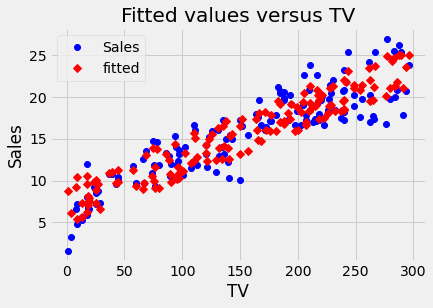

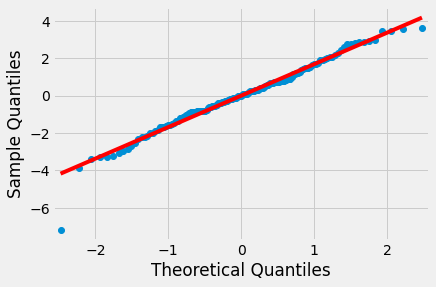

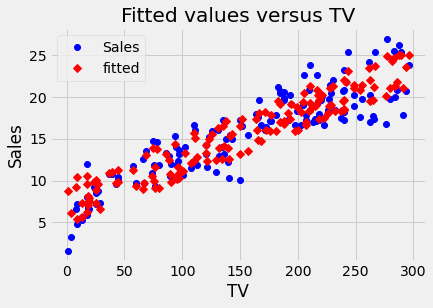

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(ols_model.resid, line = 's')
sm.graphics.plot_fit(ols_model, 1, vlines=False)